# Understanding the Problem and Data Preparation 

## Problem Definition
Clarify the goal of classifying credit risk of applicants using the available features in the dataset. The primary aim is to predict whether a loan application is of high risk or low risk based on financial and personal details provided by applicants.

## Data Loading and Initial Exploration
First, let's load the dataset and perform an initial exploration to understand its structure and data types. This includes:

- Viewing the first few rows to understand the format.
- Generating descriptive statistics to get an overview of numerical features.
- Checking for missing values or any inconsistencies in the data.

In [259]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring visuals
%matplotlib inline
sns.set_style("whitegrid")


In [260]:
# Load the dataset
data_path = '../data/german.data'
data = pd.read_csv(data_path, header=None, delim_whitespace=True)

# Displaying the first few rows of the dataset to ensure correct loading
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [261]:

# Column names based on the dataset attribute description
column_names = [
    "Status of Existing Checking Account", "Duration in Months", "Credit History",
    "Purpose", "Credit Amount", "Savings Account/Bonds", "Present Employment Since",
    "Installment Rate in Percentage of Disposable Income", "Personal Status and Sex",
    "Other Debtors/Guarantors", "Present Residence Since", "Property", "Age in Years",
    "Other Installment Plans", "Housing", "Number of Existing Credits at This Bank",
    "Job", "Number of People Liable to Provide Maintenance For", "Telephone",
    "Foreign Worker","Risk"
]

# Assign column names to the DataFrame
data.columns = column_names

# Verify the column names were added successfully
data.head()



,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [262]:
data.dtypes

Status of Existing Checking Account                    object
Duration in Months                                      int64
Credit History                                         object
Purpose                                                object
Credit Amount                                           int64
Savings Account/Bonds                                  object
Present Employment Since                               object
Installment Rate in Percentage of Disposable Income     int64
Personal Status and Sex                                object
Other Debtors/Guarantors                               object
Present Residence Since                                 int64
Property                                               object
Age in Years                                            int64
Other Installment Plans                                object
Housing                                                object
Number of Existing Credits at This Bank                 int64
Job     

### Generate descriptive statistics:

In [263]:
# Generate descriptive statistics to understand the dataset's numerical distributions
display(data.describe())


,Duration in Months,Credit Amount,Installment Rate in Percentage of Disposable Income,Present Residence Since,Age in Years,Number of Existing Credits at This Bank,Number of People Liable to Provide Maintenance For,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Data Preprocessing
This includes several tasks such as:

- Cleaning the data by handling missing values and correcting any errors.
- Encoding categorical variables into numeric format using techniques like one-hot encoding, especially since many machine learning models require numerical input.
- Normalizing or standardizing numerical variables if required to ensure models function optimally.

### Check for missing values:

In [264]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Status of Existing Checking Account                    0
Duration in Months                                     0
Credit History                                         0
Purpose                                                0
Credit Amount                                          0
Savings Account/Bonds                                  0
Present Employment Since                               0
Installment Rate in Percentage of Disposable Income    0
Personal Status and Sex                                0
Other Debtors/Guarantors                               0
Present Residence Since                                0
Property                                               0
Age in Years                                           0
Other Installment Plans                                0
Housing                                                0
Number of Existing Credits at This Bank                0
Job                                                    0

In [265]:
data_text= data.copy()



descriptions = {
    'Status of Existing Checking Account': {
        'A11': '< 0 DM',
        'A12': '0 <= ... < 200 DM',
        'A13': '>= 200 DM / salary assignments for at least 1 year',
        'A14': 'no checking account'
    },
    'Credit History': {
        'A30': 'no credits taken/ all credits paid back duly',
        'A31': 'all credits at this bank paid back duly',
        'A32': 'existing credits paid back duly till now',
        'A33': 'delay in paying off in the past',
        'A34': 'critical account/ other credits existing (not at this bank)'
    },
    'Purpose': {
        'A40': 'car (new)',
        'A41': 'car (used)',
        'A42': 'furniture/equipment',
        'A43': 'radio/television',
        'A44': 'domestic appliances',
        'A45': 'repairs',
        'A46': 'education',
        'A47': '(vacation - does not exist?)',
        'A48': 'retraining',
        'A49': 'business',
        'A410': 'others'
    },
    'Savings Account/Bonds': {
        'A61': '< 100 DM',
        'A62': '100 <= ... < 500 DM',
        'A63': '500 <= ... < 1000 DM',
        'A64': '>= 1000 DM',
        'A65': 'unknown/ no savings account'
    },
    'Present Employment Since': {
        'A71': 'unemployed',
        'A72': '< 1 year',
        'A73': '1 <= ... < 4 years',
        'A74': '4 <= ... < 7 years',
        'A75': '>= 7 years'
    },
    'Personal Status and Sex': {
        'A91': 'male: divorced/separated',
        'A92': 'female: divorced/separated/married',
        'A93': 'male: single',
        'A94': 'male: married/widowed',
        'A95': 'female: single'
    },
    'Other Debtors/Guarantors': {
        'A101': 'none',
        'A102': 'co-applicant',
        'A103': 'guarantor'
    },
    'Property': {
        'A121': 'real estate',
        'A122': 'building society savings agreement/ life insurance',
        'A123': 'car or other, not in attribute 6',
        'A124': 'unknown / no property'
    },
    'Other Installment Plans': {
        'A141': 'bank',
        'A142': 'stores',
        'A143': 'none'
    },
    'Housing': {
        'A151': 'rent',
        'A152': 'own',
        'A153': 'for free'
    },
    'Job': {
        'A171': 'unemployed/ unskilled - non-resident',
        'A172': 'unskilled - resident',
        'A173': 'skilled employee / official',
        'A174': 'management/ self-employed/ highly qualified employee/ officer'
    },
    'Telephone': {
        'A191': 'none',
        'A192': 'yes, registered under the customer\'s name'
    },
    'Foreign Worker': {
        'A201': 'yes',
        'A202': 'no'
    }
}


for column in descriptions:
        if column in data_text.columns:
            # Mapa de códigos a descripciones para la columna actual
            code_to_description = descriptions[column]
            # Aplicar el mapa a la columna
            data_text[column] = data_text[column].map(code_to_description).fillna(data_text[column])
            
data_text.head()

,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer's name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [266]:

# Isolate categorical columns
categorical_columns = data.dtypes[data.dtypes == 'object'].index.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['Status of Existing Checking Account', 'Credit History', 'Purpose', 'Savings Account/Bonds', 'Present Employment Since', 'Personal Status and Sex', 'Other Debtors/Guarantors', 'Property', 'Other Installment Plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker']


In [267]:
# Identify ordinal variables and numerical booleans
for col in categorical_columns:
    num_unique_values = data[col].nunique()
    print(col, num_unique_values)

Status of Existing Checking Account 4
Credit History 5
Purpose 10
Savings Account/Bonds 5
Present Employment Since 5
Personal Status and Sex 4
Other Debtors/Guarantors 3
Property 4
Other Installment Plans 3
Housing 3
Job 4
Telephone 2
Foreign Worker 2


In [268]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    num_unique_values = data[col].nunique()
    if num_unique_values == 2:
        # Boolean numerical encoding
        data[col] = data[col].astype('category').cat.codes
    elif num_unique_values > 2:
        # Ordinal enco
        data[col] = label_encoder.fit_transform(data[col])

data.dtypes

Status of Existing Checking Account                    int32
Duration in Months                                     int64
Credit History                                         int32
Purpose                                                int32
Credit Amount                                          int64
Savings Account/Bonds                                  int32
Present Employment Since                               int32
Installment Rate in Percentage of Disposable Income    int64
Personal Status and Sex                                int32
Other Debtors/Guarantors                               int32
Present Residence Since                                int64
Property                                               int32
Age in Years                                           int64
Other Installment Plans                                int32
Housing                                                int32
Number of Existing Credits at This Bank                int64
Job                     

In [269]:
data.head()


,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


## Exploratory Data Analysis (EDA)
With the data cleaned and preprocessed, let’s dive into a more detailed exploratory analysis. This step will help us understand deeper patterns and potential relationships in the data that could inform the model training phase.

### Univariate Analysis
Begin by examining the distribution of key variables, particularly the target variable if it’s defined, and other significant predictors.

In [270]:

def univariate_plot(data_encoded, data_text, column):
    """
    Genera un histograma y un boxplot (para datos numéricos) o un countplot (para datos categóricos)
    para una columna dada de un DataFrame, utilizando datos codificados para los cálculos y datos originales para las etiquetas.
    
    Args:
    data_encoded (DataFrame): El DataFrame que contiene los datos codificados.
    data_text (DataFrame): El DataFrame que contiene los datos originales.
    column (str): Nombre de la columna a analizar.
    """
    # Verificar que la columna existe en ambos DataFrames
    if column not in data_encoded.columns:
        print(f"Columna '{column}' no encontrada en data_encoded")
        return
    if column not in data_text.columns:
        print(f"Columna '{column}' no encontrada en data_text")
        return
    
    # Crear una figura con dos subplots (lado a lado)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    if pd.api.types.is_numeric_dtype(data_encoded[column]):
        # Histograma usando datos codificados
        sns.histplot(data_encoded[column], kde=False, ax=axs[0], color='blue')
        axs[0].set_title(f'Distribution of {column} (Encoded)')
        axs[0].axvline(data_encoded[column].mean(), color='r', linestyle='--', label='Mean (Encoded)')
        axs[0].axvline(data_encoded[column].median(), color='g', linestyle='-', label='Median (Encoded)')
        axs[0].legend()
        
        # Boxplot usando datos originales
        sns.boxplot(x=data_text[column], ax=axs[1], color='cyan')
        axs[1].set_title(f'Boxplot of {column} (Original)')
    else:
        # Countplot usando datos codificados
        sns.countplot(x=data_encoded[column], ax=axs[0], color='blue')
        axs[0].set_title(f'Countplot of {column} (Encoded)')
        
        # Countplot usando datos originales
        sns.countplot(x=data_text[column], ax=axs[1], color='cyan')
        axs[1].set_title(f'Countplot of {column} (Original)')
    
    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [271]:
def count_outliers(data, column):
    # Calcular el primer y tercer cuartil
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar los outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    return num_outliers

TypeError: Horizontal orientation requires numeric `x` variable.

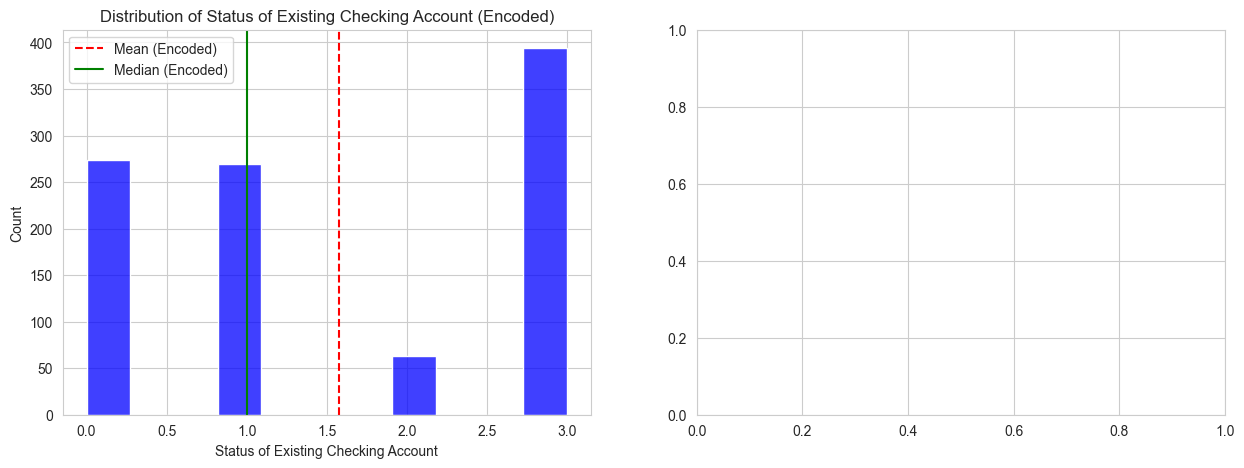

In [272]:
univariate_plot(data,data_text,"Status of Existing Checking Account")

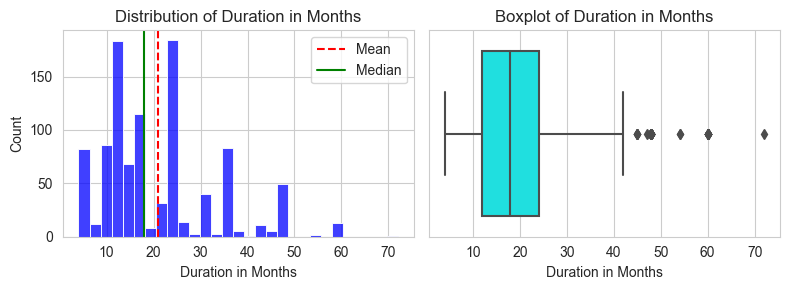

In [ ]:
univariate_hits(data,"Duration in Months")

In [ ]:
dim_outliers = count_outliers(data,"Duration in Months")
dim_outliers 

70

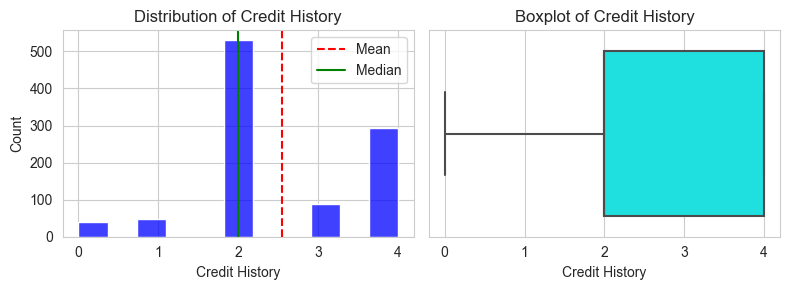

In [ ]:
univariate_hits(data,"Credit History")